In [41]:
import pandas as pd
import os; os.getcwd()
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [42]:
# Load pandas from zip
balanced_panel_df = pd.read_stata("../data/full_panel_rain_traj.dta")


balanced_panel_df[["LAT_DD_MOD", "LON_DD_MOD"]] = balanced_panel_df.groupby('holder_id')[["LAT_DD_MOD", "LON_DD_MOD"]].transform('mean')


/var/folders/22/d2d1hrtn3kl9cq0gsx95c6lr0000gn/T/ipykernel_12352/3673388277.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  balanced_panel_df = pd.read_stata("../data/full_panel_rain_traj.dta")


## Create Map of Households

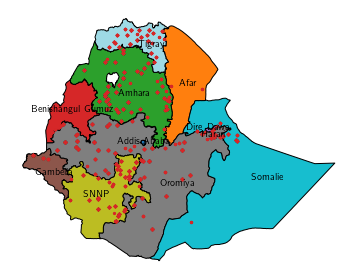

In [43]:
map = gpd.read_file("../data/ethiopiaworeda/Eth_Woreda_2013.shp").replace({'REGIONNAME' : {'Beneshangul Gumu' : 'Benishangul Gumuz',
                                                                                       'Hareri' : 'Harari',
                                                                                       'SNNPR' : 'SNNP',
                                                                                       'Oromia' : 'Oromiya',
                                                                                       'Somali' : 'Somalie',
                                                                                       'Gambela' : 'Gambella'}})

# Get number of households per region
# hhids = df.drop_duplicates(['holder_id', 'wave']).groupby(['region', 'wave'])['holder_id'].count()

fig, ax = plt.subplots()

ax.set_axis_off()

with mpl.rc_context(rc={'text.usetex': True}):
    merged_map = (
        map
        .dissolve('REGIONNAME')
        .reset_index('REGIONNAME')
        .to_crs(epsg= 4326)
    )
    
    merged_map.plot(legend=True,
                    legend_kwds={'label' : "Number of Households"},
                ax=ax,
                cmap = 'tab20',
                missing_kwds={'color': 'lightgrey'},
                edgecolor='black')
    
    merged_map.apply(lambda x: ax.annotate(text=x['REGIONNAME'], xy=x.geometry.representative_point().coords[0], ha='center'), axis=1)
    
    panel_gdf = gpd.GeoDataFrame(balanced_panel_df.dropna(subset=["LON_DD_MOD", "LAT_DD_MOD"]), 
                                 geometry=gpd.points_from_xy(balanced_panel_df["LON_DD_MOD"].dropna(),
                                                             balanced_panel_df["LAT_DD_MOD"].dropna()), crs=4326)
    
    panel_gdf.plot(ax=ax, color='tab:red', markersize=5)


    plt.tight_layout()

    plt.savefig("../results/figures/map_hhids.pdf", format='pdf', dpi=160)

In [44]:
panel_gdf.drop_duplicates('geometry')

,holder_id,household_id,seedtype,harvest_kg,parcesizeHA,parcesizeHA_wiz,urea_kg,dap_kg,hhlabor,hiredmen,...,h_tot,h_wetQ,h_wetQstart,h_eviarea,h_evimax,h_grn,h_sen,_merge,trajectory,geometry
0,0101010160100201,01010101601002,Traditional,0.0,0.0560,0.0560,0.00,0.00,9.0,0.0,...,1031.0,675.0,18.0,41.0,0.3747,185.0,264.0,Matched (3),000,POINT (37.89088 14.35382)
9,0101020140300101,01010201403001,Traditional,0.0,0.1313,0.1313,0.00,0.00,8.0,0.0,...,884.0,595.0,18.0,41.0,0.3747,185.0,264.0,Matched (3),000,POINT (38.21025 14.28859)
36,0101030010605201,01010300106052,Traditional,2.0,0.0010,0.0010,0.00,0.00,1.0,1.0,...,786.0,576.0,18.0,41.0,0.3747,185.0,264.0,Matched (3),000,POINT (38.47384 14.10976)
39,0101030180400401,01010301804004,Traditional,25.0,0.1499,0.1499,0.69,0.81,18.0,0.0,...,1029.0,747.0,18.0,41.0,0.3747,185.0,264.0,Matched (3),000,POINT (38.48033 13.84408)
66,0101050020404901,01010500204049,Traditional,0.0,0.0362,0.0362,0.00,0.00,12.0,0.0,...,1033.0,764.0,18.0,41.0,0.3747,185.0,264.0,Matched (3),000,POINT (37.98319 14.08628)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,1301010140502201,13010101405022,Traditional,0.0,0.6907,0.6907,50.00,0.00,90.0,0.0,...,594.0,291.0,18.0,37.0,0.3974,230.0,275.0,Matched (3),000,POINT (42.14774 9.26446)
3450,1501020070401401,15010200704014,Traditional,0.0,0.0066,0.0066,0.00,0.00,6.0,0.0,...,485.0,261.0,18.0,22.0,0.2100,201.0,263.0,Matched (3),000,POINT (41.71865 9.47303)
3453,1501020160500401,15010201605004,Improved,0.0,0.0075,0.0075,3.00,0.00,24.0,0.0,...,493.0,255.0,18.0,22.0,0.2100,201.0,263.0,Matched (3),100,POINT (42.08237 9.55092)
3459,1501020280104901,15010202801049,Traditional,25.0,0.0177,0.0177,0.00,0.00,9.0,0.0,...,442.0,229.0,18.0,22.0,0.2100,201.0,263.0,Matched (3),000,POINT (42.14610 9.63095)


## Create Summary Table

In [45]:
def add_note(table, note, n):
    
    return table.replace("\\end{tabular}\n\\end{table}", f"\\multicolumn{{{n}}}{{l}}{{Note: {note}}}\n\\end{{tabular}}\n\\end{{table}}")

fancy_rename_dict = {'parcesizeHA_wiz' : 'Parcel Size',
              'hhlabor' : 'Household Labor for Harvest (Days)',
              'hiredlabor' : 'Hired Labor for Harvest (Days)',
              'age_head_wiz' : 'Age of Household Head',
              "female"  : "Sex of Household Head",
              "asset_index" : "Asset Index",
              "title" : "Does the HH have a title to this land?",
              'dist_road_wiz' : 'Distance to Nearest Asphalt Road (km)',
              'dist_borderpost_wiz' : 'Distance to Nearest Border (km)',
              'dist_market_wiz' : 'Distance to Nearest Market (km)',
              'dist_popcenter_wiz' : 'Distance to Nearest Population Center (km)',
              'dist_admctr_wiz' : 'Distance to Nearest Administrative Center (km)',
              'fertcosts' : 'Fertilizer Costs',
              'dirrigation' : 'Do you irrigate?',
              'numadult' : 'Number of Adults',
              'numwomen' : 'Number of Women',
              'numchildren' : 'Number of Children',
              "h_tot" : "Total Rainfall (mm)",
            'YIELD_cropcutdry_tr' : 'Crop Cut Dry Yield (kg/ha)',
            'YIELD_selfr_tr' : 'Self-reported Yields (kg/ha)'
              }

summary_latex = (
    balanced_panel_df
    .assign(female = lambda df: (df['sex_head'] == 2).astype(int))
    .rename({'wave' : "Wave"}, axis=1)
    [list(fancy_rename_dict.keys()) + ['Wave']]
    .groupby('Wave')
    .describe()
    .loc[:, (slice(None), ['count', 'mean', 'std'])].T
    .rename({'count' : 'N', 'mean' : 'Mean', 'std' : 'Std. Dev.', 'min' : 'Min', 'max' : 'Max'}, axis=0)
    .rename(fancy_rename_dict)
    .applymap("{:,.2f}".format)
    .to_latex(label = "tbl:summary",
              caption="Summary Statistics for Households",
              longtable=True)
    )

with open("../results/tables/summary.tex", 'w') as f:
    f.write(add_note(summary_latex, "Parcel size, yield and distance variables winsorized at the 1\% level.", 6))


/var/folders/22/d2d1hrtn3kl9cq0gsx95c6lr0000gn/T/ipykernel_12352/2321942851.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  balanced_panel_df


In [46]:
(    balanced_panel_df
    .assign(female = lambda df: (df['sex_head'] == 2).astype(int))
    .rename({'wave' : "Wave"}, axis=1)
    [list(fancy_rename_dict.keys()) + ['Wave']]
    .groupby('Wave')
    .describe())

parcesizeHA_wiz                                                   \
               count      mean       std       min      25%       50%   
Wave                                                                    
1.0           1157.0  0.305182  0.353534  0.000000  0.06930  0.190800   
2.0           1157.0  0.312347  0.386250  0.000880  0.07536  0.186335   
3.0           1157.0  0.299326  0.345075  0.000805  0.06805  0.181945   

                         hhlabor             ... YIELD_cropcutdry_tr  \
           75%       max   count       mean  ...                 75%   
Wave                                         ...                       
1.0   0.429800  3.216000  1157.0  44.511668  ...             0.00000   
2.0   0.409020  3.741255  1157.0  36.872083  ...           146.09375   
3.0   0.395726  2.948980  1157.0  35.947277  ...           587.50000   

                YIELD_selfr_tr                                             \
            max          count         mean          std  min         25%   
Wave                                                                        
1.0   1125.0000         1081.0   177.362488   424.941315  0.0    0.000000   
2.0   2925.0000         1114.0  1335.774658  1171.413940  0.0  509.833893   
3.0   4419.0625         1102.0  1228.915649  1107.163940  0.0  376.532745   

                                             
              50%          75%          max  
Wave                                         
1.0      0.000000     0.000000  2059.025391  
2.0   1013.709229  1795.157349  6241.084473  
3.0    924.891968  1781.111816  4979.528320  

[3 rows x 160 columns]

In [51]:
print(summary_latex)

\begin{longtable}{lllll}
\caption{Summary Statistics for Households}
\label{tbl:summary}\\
\toprule
                             & Wave &       1.0 &       2.0 &       3.0 \\
\midrule
\endfirsthead
\caption[]{Summary Statistics for Households} \\
\toprule
                             & Wave &       1.0 &       2.0 &       3.0 \\
\midrule
\endhead
\midrule
\multicolumn{5}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Parcel Size & N &  1,157.00 &  1,157.00 &  1,157.00 \\
                             & Mean &      0.31 &      0.31 &      0.30 \\
                             & Std. Dev. &      0.35 &      0.39 &      0.35 \\
Household Labor for Harvest (Days) & N &  1,157.00 &  1,157.00 &  1,157.00 \\
                             & Mean &     44.51 &     36.87 &     35.95 \\
                             & Std. Dev. &     70.07 &     51.33 &     46.30 \\
Hired Labor for Harvest (Days) & N &  1,157.00 &  1,157.00 &  1,157.00 \\
                             & Me

In [48]:
traj_table = pd.concat([balanced_panel_df['trajectory'].rename("Frequency").value_counts(), 
                        balanced_panel_df['trajectory'].rename('Share').value_counts(normalize=True)], 
                       axis=1)

traj_table.index.name = "Trajectory"

traj_latex = traj_table.style.format(
    {'Frequency' : '{:,.0f}',
     'Share' : "{:.3f}"}).to_latex(caption='Trajectories of Households', label='tbl:trajectories',
                                               hrules=True, position_float='centering')

with open("../results/tables/traj.tex", 'w') as f:
    f.write(traj_latex)

In [49]:
traj_table

,Frequency,Share
Trajectory,,
000,2124,0.611927
111,456,0.131374
011,228,0.065687
001,219,0.063094
010,153,0.044080
100,108,0.031115
110,96,0.027658
101,87,0.025065


In [50]:
print(traj_latex)

\begin{table}
\centering
\caption{Trajectories of Households}
\label{tbl:trajectories}
\begin{tabular}{lrr}
\toprule
 & Frequency & Share \\
Trajectory &  &  \\
\midrule
000 & 2,124 & 0.612 \\
111 & 456 & 0.131 \\
011 & 228 & 0.066 \\
001 & 219 & 0.063 \\
010 & 153 & 0.044 \\
100 & 108 & 0.031 \\
110 & 96 & 0.028 \\
101 & 87 & 0.025 \\
\bottomrule
\end{tabular}
\end{table}

